In [1]:
#read the data
import pandas as pd

raw_data = pd.read_csv('housing.csv')

In [2]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
raw_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
import matplotlib.pyplot as plt
raw_data.hist(bins = 50,figsize= (20,15))
plt.show()

In [7]:
import numpy as np

def split_train_test(data,test_ratio):
	shuffled_indices = np.random.permutation(len(data))
	test_size = int(len(data)*test_ratio)
	test_indices = shuffled_indices[:test_size]
	train_indices = shuffled_indices[test_size:]
	return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
train_set,test_set = split_train_test(raw_data,0.2)

In [9]:
import hashlib

In [10]:
def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier).digest()[-1]<256*test_ratio)

def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.iloc[~in_test_set],data.iloc[in_test_set]

In [11]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(raw_data,test_size = 0.25,random_state = 0)

In [12]:
income = raw_data['median_income']

In [13]:
from matplotlib import pyplot as plt 

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

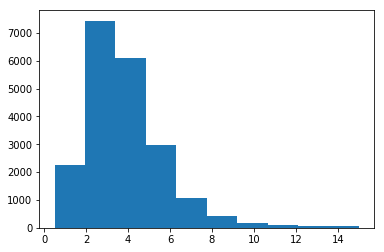

In [14]:
plt.hist(income.values)

In [15]:
raw_data["income_cat"] = np.ceil(raw_data["median_income"]/1.5)

In [16]:
raw_data["income_cat"].where(raw_data["income_cat"]<5,5.0,inplace = True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state = 17)

for train_index, test_index in split.split(raw_data, raw_data["income_cat"]):
    strat_train_set = raw_data.loc[train_index]
    strat_test_set = raw_data.loc[test_index]

In [17]:
raw_data["income_cat"].value_counts()/len(raw_data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
raw_data["income_cat"].describe()

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: income_cat, dtype: float64

In [19]:
raw_data["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [20]:
for set in(strat_train_set,strat_test_set):
	set.drop(["income_cat"],axis = 1,inplace = True)

In [21]:
housing = strat_train_set.copy()

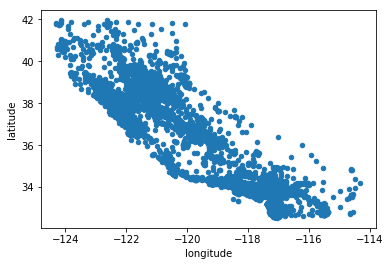

In [22]:
housing.plot(kind="scatter",x="longitude",y="latitude")

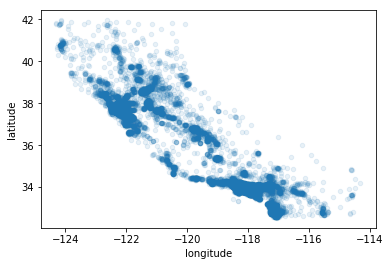

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

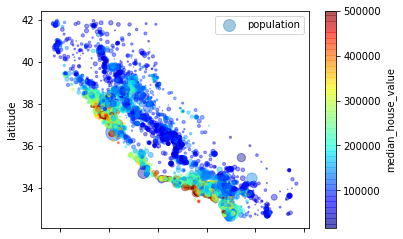

In [24]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925118,-0.108937,0.034962,0.059842,0.092668,0.044903,-0.016408,-0.048948
latitude,-0.925118,1.000000,0.013080,-0.026514,-0.057691,-0.102432,-0.061392,-0.077177,-0.140303
housing_median_age,-0.108937,0.013080,1.000000,-0.363241,-0.324073,-0.301130,-0.305945,-0.123429,0.098007
total_rooms,0.034962,-0.026514,-0.363241,1.000000,0.928783,0.861098,0.917584,0.201371,0.137847
total_bedrooms,0.059842,-0.057691,-0.324073,0.928783,1.000000,0.882794,0.979037,-0.006680,0.053267
population,0.092668,-0.102432,-0.301130,0.861098,0.882794,1.000000,0.912972,0.006128,-0.023161
households,0.044903,-0.061392,-0.305945,0.917584,0.979037,0.912972,1.000000,0.014729,0.069283
median_income,-0.016408,-0.077177,-0.123429,0.201371,-0.006680,0.006128,0.014729,1.000000,0.689774
median_house_value,-0.048948,-0.140303,0.098007,0.137847,0.053267,-0.023161,0.069283,0.689774,1.000000


In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689774
total_rooms           0.137847
housing_median_age    0.098007
households            0.069283
total_bedrooms        0.053267
population           -0.023161
longitude            -0.048948
latitude             -0.140303
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018991EDC9E8>,
      dtype=object)

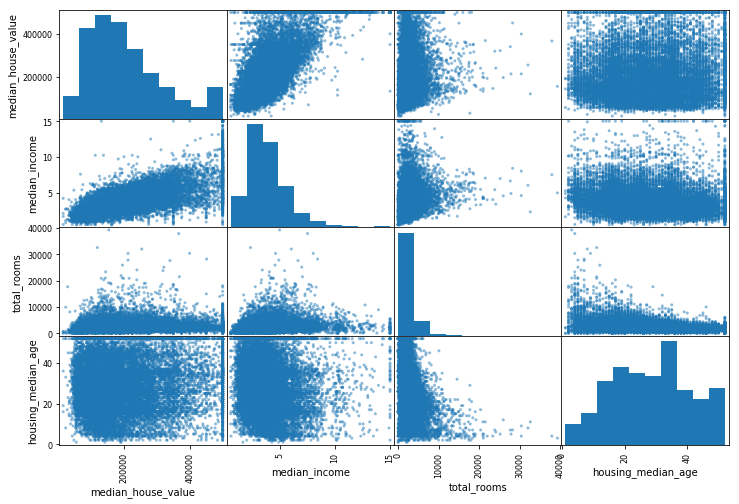

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))        

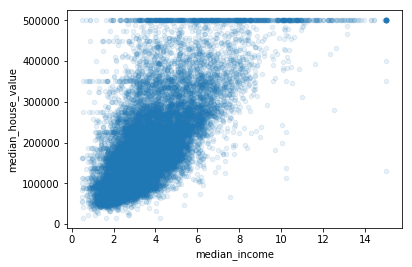

In [29]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha = 0.1)

In [30]:
housing["roms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_room"] = housing["population"]/housing["total_rooms"]

In [31]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.689774
roms_per_household     0.148177
total_rooms            0.137847
housing_median_age     0.098007
households             0.069283
total_bedrooms         0.053267
population            -0.023161
population_per_room   -0.030419
longitude             -0.048948
latitude              -0.140303
bedrooms_per_room     -0.257873
Name: median_house_value, dtype: float64

In [32]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [34]:
housing_num = housing.drop("ocean_proximity",axis = 1)

In [35]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [36]:
imputer.statistics_

array([-118.48   ,   34.24   ,   29.     , 2130.5    ,  435.     ,
       1166.     ,  409.5    ,    3.53525])

In [37]:
housing_num.median().values

array([-118.48   ,   34.24   ,   29.     , 2130.5    ,  435.     ,
       1166.     ,  409.5    ,    3.53525])

In [38]:
X = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [41]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [43]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [44]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [45]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y = None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [46]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',Imputer(strategy = "median")),('attribs_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
 
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """
 
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
 
    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """
 
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)
 
        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)
 
        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
 
        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape
 
        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]
 
        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))
 
        self.categories_ = [le.classes_ for le in self._label_encoders_]
 
        return self
 
    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)
 
        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
 
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])
 
        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)
 
        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)
 
        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]
 
        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [49]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer',Imputer(strategy="median")),('attr_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler()),])
cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)),('label_binarizer',CategoricalEncoder(encoding="onehot-dense")),])
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline",num_pipeline),("cat_pipeline",cat_pipeline),])



In [50]:
housing_prepared = full_pipeline.fit_transform(housing)

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [56]:
print(lin_reg.predict(some_data_prepared))

[395723.0962982  220998.68251746 205442.36107238 131346.16296199
 224793.03558532]


In [57]:
print(list(some_labels))

[423900.0, 174200.0, 198900.0, 105100.0, 162000.0]


In [61]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67842.81600984564

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse  =mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [76]:
tree_rmse_scores

array([68462.22992065, 68346.60220763, 67762.42481193, 74287.75138762,
       73097.95315839, 70801.62934074, 70831.47832815, 70661.30219076,
       66037.86108522, 67368.32797729])

In [79]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [80]:
display_scores(tree_rmse_scores)

Scores: [68462.22992065 68346.60220763 67762.42481193 74287.75138762
 73097.95315839 70801.62934074 70831.47832815 70661.30219076
 66037.86108522 67368.32797729]
Mean: 69765.7560408375
Standard deviation: 2488.6573894634535


In [87]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68320.34072352 68817.11990762 70063.58575183 67189.51926291
 66797.62336928 66760.77739264 67053.27573775 68718.21203557
 70095.77745755 66813.47171954]
Mean: 68062.97033582142
Standard deviation: 1258.552572297959


In [88]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [52332.70442842 52559.42946366 53856.97030171 52908.47754638
 52240.36928912 52500.91341798 52909.37390224 53228.02241597
 52207.98172025 52810.72518843]
Mean: 52755.49676741497
Standard deviation: 483.0935087775267


In [89]:
from sklearn.model_selection import GridSearchCV

para_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,para_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [92]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [94]:
cvres = grid_search.cv_results_

In [95]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64225.05953347903 {'max_features': 2, 'n_estimators': 3}
55769.669259561255 {'max_features': 2, 'n_estimators': 10}
52744.90075339514 {'max_features': 2, 'n_estimators': 30}
61166.08445796616 {'max_features': 4, 'n_estimators': 3}
51929.83373710057 {'max_features': 4, 'n_estimators': 10}
50100.85661187252 {'max_features': 4, 'n_estimators': 30}
58054.14805566756 {'max_features': 6, 'n_estimators': 3}
52240.13816610162 {'max_features': 6, 'n_estimators': 10}
49463.49846846275 {'max_features': 6, 'n_estimators': 30}
57621.90917522437 {'max_features': 8, 'n_estimators': 3}
51154.96854651268 {'max_features': 8, 'n_estimators': 10}
49552.83238019895 {'max_features': 8, 'n_estimators': 30}
63698.705720632206 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54287.06306815 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59687.38245259647 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52484.055717093186 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [96]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [97]:
feature_importance

array([8.29392123e-02, 7.62847995e-02, 4.18505306e-02, 1.82010080e-02,
       1.60829081e-02, 1.82111914e-02, 1.57231445e-02, 3.56809498e-01,
       7.46777650e-02, 1.07102773e-01, 1.47192009e-02, 1.18921229e-02,
       1.56188232e-01, 1.93309029e-04, 2.09639038e-03, 7.02791422e-03])

In [99]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.35680949846837084, 'median_income'),
 (0.15618823175699562, 'INLAND'),
 (0.10710277305590452, 'pop_per_hhold'),
 (0.08293921225671655, 'longitude'),
 (0.07628479954544372, 'latitude'),
 (0.07467776501165445, 'rooms_per_hhold'),
 (0.04185053058883791, 'housing_median_age'),
 (0.018211191370133405, 'population'),
 (0.018201007970220267, 'total_rooms'),
 (0.01608290813105871, 'total_bedrooms'),
 (0.015723144450168883, 'households'),
 (0.014719200913763207, 'bedrooms_per_room'),
 (0.01189212285340688, '<1H OCEAN'),
 (0.007027914216497706, 'NEAR OCEAN'),
 (0.002096390381606388, 'NEAR BAY'),
 (0.00019330902922086812, 'ISLAND')]

In [101]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

In [102]:
final_rmse

50014.04876609009